In [1]:
import numpy as np
import cv2
from apply_kernel import *
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
def apply_dilation(img,kernel,padding=True):
    ksize = len(kernel)
    pimg = img
    if padding:
        pimg = padd(img,ksize//2)
#     print(pimg)
    new_img = np.array(pimg,copy=True)
    
    for i in range(ksize//2,pimg.shape[0]-ksize//2):
        for j in range(ksize//2,pimg.shape[1]-ksize//2):
#             print(i,":",j)
            if pimg[i,j] == kernel[ksize//2,ksize//2]:
                new_img[i-ksize//2:i+1+ksize//2,j-ksize//2:j+1+ksize//2] = kernel
            
    return new_img

def apply_erosion(img,kernel):
    ksize = len(kernel)
    new_img = np.array(img,copy=True)
    for i in range(ksize//2,img.shape[0]-ksize//2):
        for j in range(ksize//2,img.shape[1]-ksize//2):
            if np.array_equal(img[i-ksize//2:i+1+ksize//2,j-ksize//2:j+1+ksize//2], kernel):
                new_img[i,j] = 255
    new_img[new_img != 255] = 0
    new_img[new_img == 255] = 1
    return new_img

def apply_opening(img, kernel):
    erosed_img = apply_erosion(img, kernel)
    dil_erosed_img = apply_dilation(erosed_img, kernel)
    plt.figure("opening")
    
    plt.subplot(131)
    plt.imshow(img,cmap='gray')
    plt.title("original")
    
    plt.subplot(132)
    plt.imshow(erosed_img,cmap='gray')
    plt.title("after erosion")
    
    plt.subplot(133)
    plt.imshow(dil_erosed_img,cmap='gray')
    plt.title("after erosion & dilation")
    plt.show()
    return dil_erosed_img

def apply_closing(img, kernel):
    dilated_img = apply_dilation(img, kernel)
    er_dilated_img = apply_dilation(dilated_img, kernel)
    plt.figure("closing")
    
    plt.subplot(131)
    plt.imshow(img,cmap='gray')
    plt.title("original")
    
    plt.subplot(132)
    plt.imshow(dilated_img,cmap='gray')
    plt.title("after dilation")
    
    plt.subplot(133)
    plt.imshow(er_dilated_img,cmap='gray')
    plt.title("after dilation & erosion")
    plt.show()
    return er_dilated_img

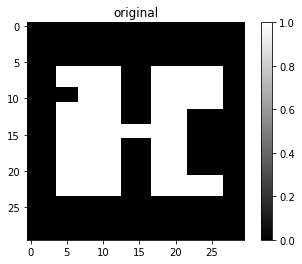

In [3]:
img = cv2.imread('images/shape2.bmp',cv2.IMREAD_GRAYSCALE)
img[img==255]=1

plt.imshow(img,cmap='gray')
plt.colorbar()
plt.title("original")
plt.show()

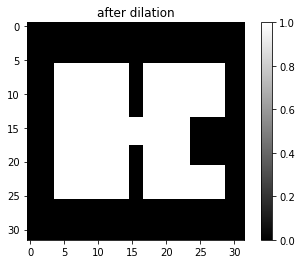

In [4]:
kernel = np.ones((3,3))
d_img = apply_dilation(img, kernel)

plt.imshow(d_img,cmap='gray')
plt.colorbar()
plt.title("after dilation")
plt.show()

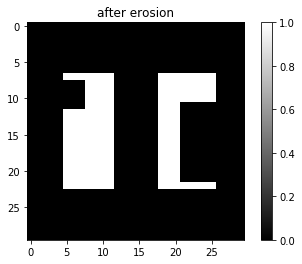

In [5]:
kernel = np.ones((3,3))
d_img = apply_erosion(img, kernel)

plt.imshow(d_img,cmap='gray')
plt.colorbar()
plt.title("after erosion")
plt.show()

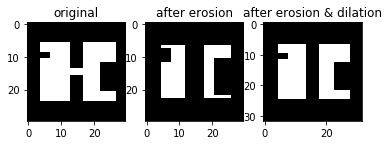

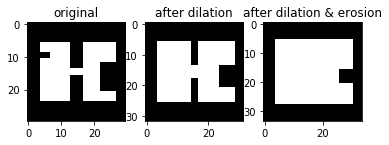

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
img = cv2.imread('images/shape2.bmp',cv2.IMREAD_GRAYSCALE)
img[img==255]=1
kernel = np.ones((3,3))

apply_opening(img,kernel)

apply_closing(img,kernel)
